# Introduction to Machine Learning Concepts

### A funny game
![Optimization](opt_valley.PNG)

![AI and ML](https://flatironschool.com/legacy-assets/images.ctfassets.net/hkpf2qd2vxgx/235ViW0mhGaFw3bjXUrUyG/35d7a4312bb78fc47a644877ac01c6ea/BlogGraphics-machinnelearning-dark-09__1_.png)

## Learning Types

![Types of Machine Learning](https://static.javatpoint.com/tutorial/machine-learning/images/types-of-machine-learning2.png)

### Supervised Learning
- Regression
    * Univariate
        * Linear
        * Non-linear
    * Multivariate
        * Linear
        * Non-linear
    
- Classification
    * Binary Class
    * Multi Class

## Univariate Linear Regression
$\textbf{X} = \begin{bmatrix}
    1 & x_{01}\\
    1 & x_{11}\\
    \vdots & \vdots\\
    1 & x_{m1}\\
\end{bmatrix}
$ and $\textbf{y} = [y_1, y_2, ..., y_m]$

$\textbf{X} \in \mathbf{R}^{m \times 2}$ and $\textbf{y} \in \mathbf{R}^{m \times 1}$ for this setting, $x$ is the dataset and $y$ is the "supervisor" ~ "target"

We are looking for a linear relation (or mapping) between $X$ and $y$ values. To find this relation, we need to find (LEARN) special coefficient which is shown as $\theta = [\theta_0, \theta_1]$.

After finding (LEARNING) $\theta$ vector, we can write a linear equation as follows:

$\textbf{y} = \textbf{X}\theta + \epsilon$ eq(1).
Where $\epsilon$ is the error term due to collecting samples.

### How to find vector $\theta$ that minimizes average error?

We will take advantages of using calculus and linear algebra. In order to find vector $\theta$ we must follow these steps below:
- Define a convex and differentiable loss function which is $L_{\theta}$
- Take the derivative of the loss function $L_{\theta}$
- Solve the derived expression for $\frac{\partial{L}}{\partial{\theta}} = 0$

We are lucky because at the end of these steps we will obtain an analytical solution to find optimal $\theta$ values.

### Convex and Diffrentiable Loss Function

In [1]:
import numpy as np # An excellent Python library for numerical methods and linear algebra
import matplotlib.pyplot as plt # A visualization library in Python

In [2]:
x = np.linspace(-5, 5, 200)
y = x**2

Text(0.5, 1.0, 'A Convex and Differentiable Function Example in 2-D Plane')

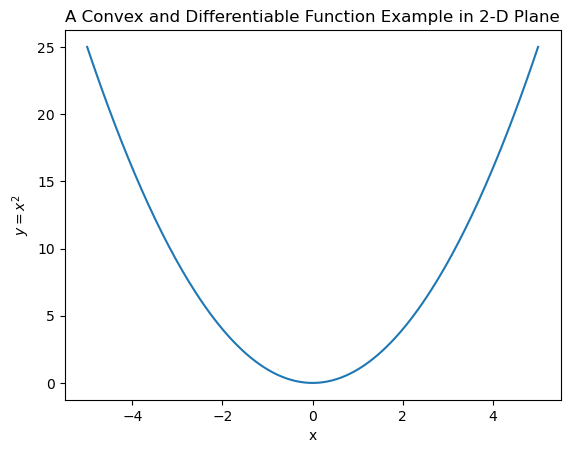

In [3]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('$y=x^{2}$')
plt.title('A Convex and Differentiable Function Example in 2-D Plane')

In [14]:
x = np.linspace(-5, 5, 200)
y = (1 - x)**3 * np.sin(2 * x)

Text(0.5, 1.0, 'A Non-convex and Differentiable Function Example in 2-D Plane')

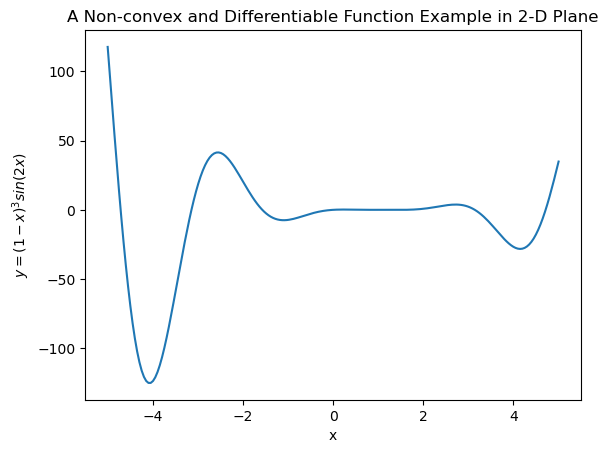

In [18]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('$y=(1 - x)^{3}sin(2x)$')
plt.title('A Non-convex and Differentiable Function Example in 2-D Plane')

In [20]:
x = np.linspace(-5, 5, 200)
y = np.abs(x)

Text(0.5, 1.0, 'A Non-convex and Non-differentiable Function Example in 2-D Plane')

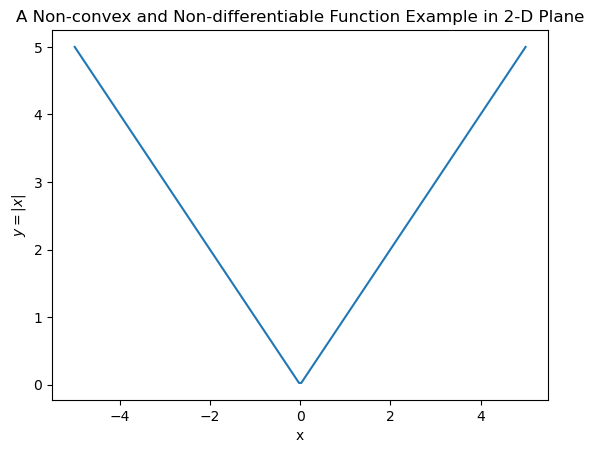

In [22]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('$y=|x|$')
plt.title('A Non-convex and Non-differentiable Function Example in 2-D Plane')

### Learning Optimal $\theta$
Let's use parabolic function as a loss function:

$L_{\theta} = \frac{1}{m} (\textbf{y} - \textbf{X}\theta)^{T}(\textbf{y} - \textbf{X}\theta)$. We can expand this equation below:

$L_{\theta} = \frac{1}{m} (\textbf{y}^{T}\textbf{y} - 2\theta^{T} \textbf{X}^{T}\textbf{y} + \theta^{T}\textbf{X}^{T}\textbf{X}\theta)$.


Let's take the derivative of $L_{\theta}$.

$\frac{\partial L_{\theta}}{\partial \theta} = \frac{2}{m} (-\textbf{X}^{T}\textbf{y} + \textbf{X}^{T}\textbf{X}\theta)$.

Let's solve $\frac{\partial L_{\theta}}{\partial \theta} = 0$.

$\hat{\theta} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{y}$.

### Coding Part

In [2]:
theta_0 = 3
theta_1 = 2
epsilon = 3 * np.random.randn(100)
x = np.linspace(0, 20, 100)
y = theta_1 * x + theta_0 + epsilon# 2x + 3 + epsilon

Text(0.5, 1.0, 'Dataset')

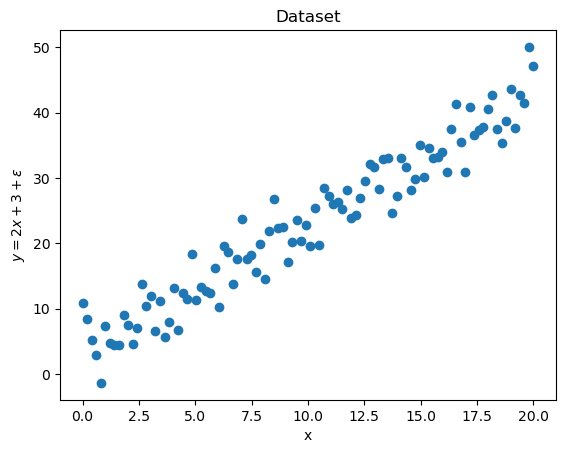

In [3]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('$y=2x + 3 + \epsilon$')
plt.title('Dataset')

In [4]:
one_cols = np.ones(x.shape).reshape((-1, 1)) # Create 1's to be added as a column to design matrix X 
X = np.concatenate([one_cols, x.reshape((-1, 1))], axis=1) # Create design matrix X

print(X.shape)
#print(X)

(100, 2)


In [5]:
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

In [6]:
theta_hat # original theta[0] = 3, theta[1] = 2

array([3.35632161, 1.97334179])

In [7]:
y_pred = X @ theta_hat

In [8]:
y_pred.shape

(100,)

In [11]:
loss = np.mean((X@theta_hat - y)**2)
loss

7.326300015434836

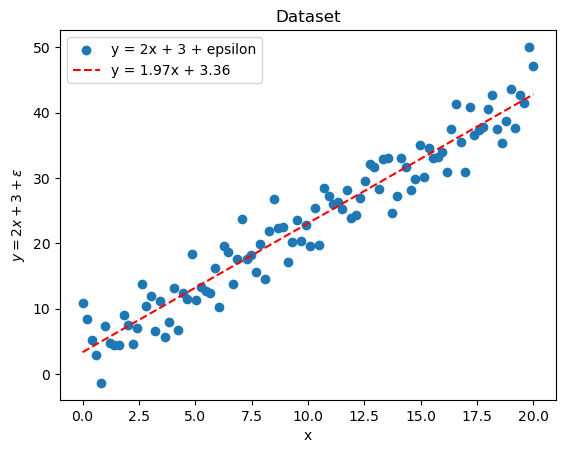

In [9]:
plt.scatter(x, y, label='y = 2x + 3 + epsilon')
plt.plot(x, y_pred, 'r--', label=f'y = {theta_hat[1]:.2f}x + {theta_hat[0]:.2f}')
plt.xlabel('x')
plt.ylabel('$y=2x + 3 + \epsilon$')
plt.title('Dataset')
plt.legend()

## Remember the Game :)

- Define a convex and differentiable loss function $L_\theta$
- Initialize vector $\theta$ with random values
    - $\theta \sim \mathcal{N}(\mu,\,\sigma^{2}) $ where $\mu=0, \sigma^{2}=1$.
- A) Take the derivative of $L_\theta$ with respect to $\theta$ (calculating gradients)
    - $\frac{\partial L_\theta}{\partial \theta} = \frac{2}{m} \textbf{X}^{T}(\textbf{X}\theta - \textbf{y})$.
- B) Update vector $\theta$ by using learning rate (step) factor and gradients
    - $\theta_{i+1} = \theta_{i} - \alpha\frac{\partial L_\theta}{\partial \theta}$.
- Repeat steps (A) and (B) for a specific number of iteration 

In [10]:
X.shape

(100, 2)

In [42]:
num_iteration = 10_000
learning_rate = 1e-5
theta_hat_gd = np.random.randn(2) # Initialize theta_hat_gd with random values in (0, 1)
m = X.shape[0]

In [43]:
theta_hat_gd

array([-0.41865407, -0.38318483])

In [44]:
for i in range(num_iteration):
    grad = (2/m) * X.T @ (X@theta_hat_gd - y)
    theta_hat_gd = theta_hat_gd - learning_rate * grad
    if i % 100 == 0:
        loss = np.mean((X@theta_hat_gd - y)**2)
        print(loss) 

941.0012163538984
553.9000130713471
328.2586018031434
196.73158555359413
120.06354894046304
75.37263654949999
49.321088427760934
34.13436718066267
25.28071995609881
20.118602585620867
17.10826746511394
15.352200665334479
14.327244201222397
13.72845096395967
13.378068262902735
13.172484624809782
13.051305253685925
12.979326215755423
12.936027249838022
12.909447160300164
12.892613803297758
12.881463137235476
12.873626243970085
12.867722287369821
12.862946381131916
12.858829358258493
12.855097741456492
12.851592120333969
12.84821957373024
12.844925936845192
12.841679635837952
12.838462265066578
12.835263094591294
12.8320758686158
12.828896939308997
12.8257241790157
12.822556346187712
12.819392715787094
12.816232863849491
12.813076541906646
12.809923603787825
12.806773962952521
12.803627567619854
12.800484386271552
12.797344399201712
12.794207593591159
12.791073960636332
12.787943493875678
12.78481618821415
12.781692039354569
12.77857104346618
12.775453196991428
12.772338496533337
12.76922

In [45]:
theta_hat_gd

array([-0.04631974,  2.22773656])

In [46]:
y_pred_gd = X@theta_hat_gd

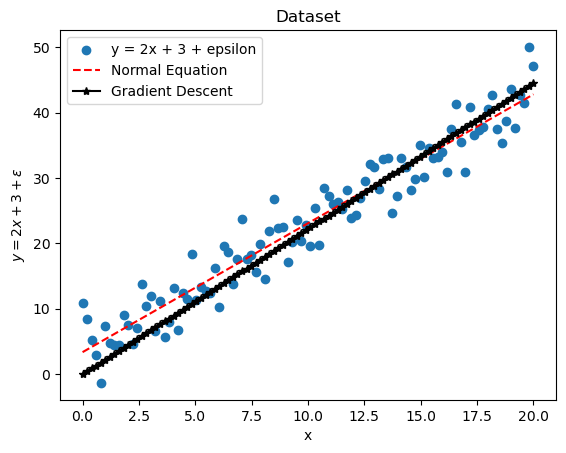

In [47]:
plt.scatter(x, y, label='y = 2x + 3 + epsilon')
plt.plot(x, y_pred, 'r--', label=f'Normal Equation')
plt.plot(x, y_pred_gd, 'k-*', label=f'Gradient Descent')
plt.xlabel('x')
plt.ylabel('$y=2x + 3 + \epsilon$')
plt.title('Dataset')
plt.legend()

In [48]:
print(f"Optimal theta values calculated by Normal Equation = {theta_hat} ")
print(f"Optimal theta values calculated by Gradient Descent = {theta_hat_gd} ")

Optimal theta values calculated by Normal Equation = [3.35632161 1.97334179] 
Optimal theta values calculated by Gradient Descent = [-0.04631974  2.22773656] 


## Binary Classification
![Binary Classification](https://www.voxco.com/wp-content/uploads/2021/11/LOGISTIC-REGRESSION.jpg)

In binary classification, samples in the dataset are labeled with two unique discrete values. For example, diagnosis of breast cancer is a binary classification problem. The dataset contains different features such as size of the tumor, smoothness of the tumor, and so on.

Let's define binary classification in a formal way:

- $\textbf{X} \in \mathbf{R}^{m \times d}$ where $m$ is the number of samples and $d$ is the number of features. 
- $\textbf{y} \in \{0, 1 \}$ where $\textbf{y}$ is a label vector containing $m$ elements. 
- We are looking for a linear model that maps given feature vector $\textbf{x}$ to $p(y=1 | \textbf{x})$ and $p(y=0 | \textbf{x})$ which are the probabilities of being class 1 or class 0. 

For a binary classification problem, we can also use linear model similar to linear regression. However, the output of the linear model must be normalized as in between 0 and 1.

In order to train a linear model for a binary classification task, we can follow the steps below:
- Calculate $\textbf{X}\theta$.
- Calculate probabilities by using sigmoid function which is mathematically defined as $\sigma(\textbf{X}\theta) = \frac{1}{1 + \mathbf{e}^{-\textbf{X}\theta}}$.
- Define a convex and differentiable loss function that takes $p(\textbf{y}=0|\textbf{x})$ $p(\textbf{y}=1|\textbf{x})$ probabilities as input. Usually we use binary cross entropy as a loss function.

    $L_{BCE}=\frac{-1}{m} \sum_{i=1}^{m} y_{i}log(\hat{y_{i}}) + (1 - y_{i}log(1 - \hat{y_{i}}))$.
- Finally we use gradient descent algorithm which is similar to linear regresiion part.

GOOD NEWS: NO MORE MATH :D

In [51]:
from mlxtend.classifier import LogisticRegression
from sklearn.datasets import load_breast_cancer
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [52]:
data_dict = load_breast_cancer(as_frame=True)

In [53]:
features = data_dict.data
labels = data_dict.target

In [54]:
features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [57]:
X = features[['mean radius', 'mean symmetry']].values
y = labels.values

In [58]:
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [59]:
lr = LogisticRegression(
    minibatches=1, # for Gradient Descent
    random_seed=1,
)

In [60]:
lr.fit(X, y)

In [61]:
lr.w_

array([[-3.99182427],
       [-1.28040254]])

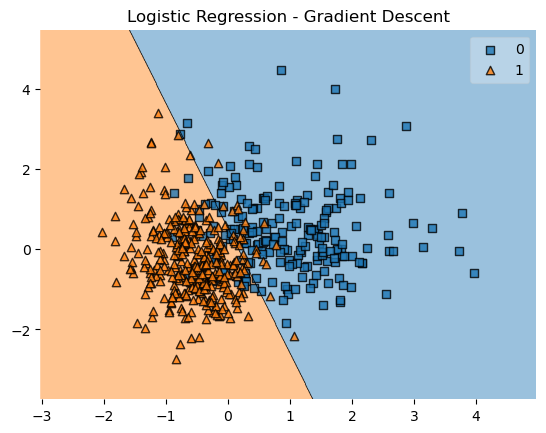

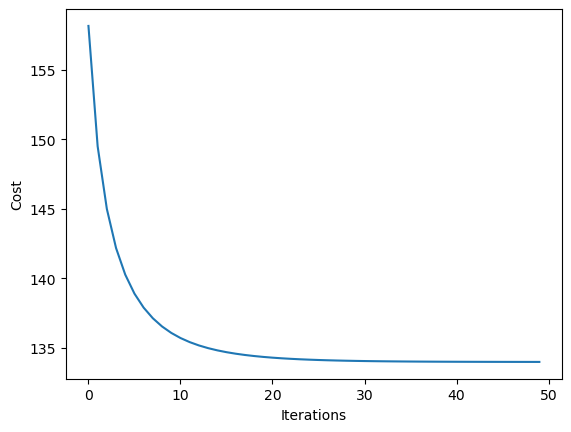

In [62]:
plot_decision_regions(X, y, clf=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Some useful resources and training material for machine learning

- [Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)
- [Sci-kit Learn Framework](https://scikit-learn.org/stable/)
- [mlxtend Framework](http://rasbt.github.io/mlxtend/)
- [Introduction to Machine Learning by Sebastian Raschka, Ph.D.](https://youtube.com/playlist?list=PLTKMiZHVd_2KyGirGEvKlniaWeLOHhUF3)
- [Intro to Deep Learning and Generative Models Course by Sebastian Raschka, Ph.D.](https://youtube.com/playlist?list=PLTKMiZHVd_2KJtIXOW0zFhFfBaJJilH51)
- [Doğal Dil İşlemeye Giriş by Huawei Research Engineers](https://www.btkakademi.gov.tr/portal/course/dogal-dil-islemeye-giris-11864)
- [Bilgisayarlı Görü Uygulama Alanları by Huawei Research Engineers](https://www.btkakademi.gov.tr/portal/course/bilgisayarli-goerue-uygulama-alanlari-12421)

In [49]:
x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))

Text(0.5, 1.0, 'A Non-convex and Non-differentiable Function Example in 2-D Plane')

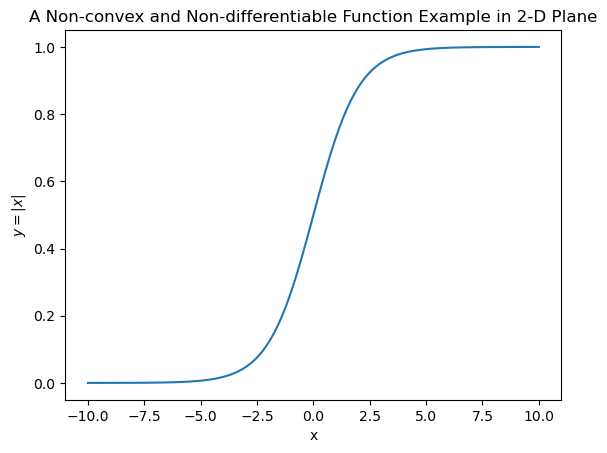

In [50]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('$y=|x|$')
plt.title('A Non-convex and Non-differentiable Function Example in 2-D Plane')